In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("sap_storing_data_hu_project.csv")
#data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Het verwijderen van de n.v.t. kolommen

In [116]:
storingen = pd.DataFrame(data=data, index=data.index, columns=['stm_oorz_groep', 'stm_oorz_code','stm_geo_gst', 'stm_fh_ddt',
                                                               'stm_sap_storeind_ddt', 'stm_sap_melddatum', 'stm_sap_meldtijd',
                                                               'stm_aanngeb_dd', 'stm_aanngeb_tijd', 'stm_aanntpl_dd',
                                                               'stm_aanntpl_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_fh_duur',
                                                               'stm_sap_storeinddatum', 'stm_sap_storeindtijd'])
storingen = storingen.iloc[1: , :] # vanaf 2 om bug te fixen m.b.t. null kolommen.
storingen = storingen.drop_duplicates()
storingen = storingen.convert_dtypes()
storingen.head()

,stm_oorz_groep,stm_oorz_code,stm_geo_gst,stm_fh_ddt,stm_sap_storeind_ddt,stm_sap_melddatum,stm_sap_meldtijd,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_sap_storeinddatum,stm_sap_storeindtijd
1,ONR-RIB,133,624.0,02/01/2006 09:00:00,02/01/2006 09:00:00,02/01/2006,09:00:00,02/01/2006,09:00:00,<NA>,00:00:00,02/01/2006,09:00:00,0,02/01/2006,09:00:00
2,ONR-DERD,143,201.0,02/01/2006 13:26:00,02/01/2006 13:26:00,02/01/2006,12:35:00,02/01/2006,12:35:00,<NA>,00:00:00,02/01/2006,13:26:00,51,02/01/2006,13:26:00
3,ONR-DERD,142,25.0,02/01/2006 17:20:00,02/01/2006 17:20:00,02/01/2006,16:40:00,02/01/2006,16:40:00,<NA>,00:00:00,02/01/2006,17:20:00,40,02/01/2006,17:20:00
4,ONR-DERD,142,12.0,02/01/2006 22:36:00,02/01/2006 22:36:00,02/01/2006,22:30:00,02/01/2006,22:30:00,<NA>,00:00:00,02/01/2006,22:36:00,6,02/01/2006,22:36:00
5,TECHONV,218,614.0,02/01/2006 11:30:00,<NA>,02/01/2006,11:23:00,02/01/2006,11:23:00,<NA>,00:00:00,02/01/2006,11:30:00,7,<NA>,00:00:00


In [40]:
print(storingen.isnull().sum().to_string())

stm_oorz_groep            43240
stm_oorz_code             43227
stm_geo_gst              116974
stm_fh_ddt               110331
stm_sap_storeind_ddt     163497
stm_sap_melddatum            27
stm_sap_meldtijd             27
stm_aanngeb_dd            21034
stm_aanngeb_tijd             27
stm_aanntpl_dd           144045
stm_aanntpl_tijd             27
stm_fh_dd                 89986
stm_fh_tijd                  27
stm_fh_duur                  27
stm_sap_storeinddatum    163453
stm_sap_storeindtijd         27


In [54]:
storingen['stm_fh_tijd']

2         13:26:00
3         17:20:00
4         22:36:00
5         11:30:00
6         23:38:00
            ...   
898518    08:24:00
898520    09:29:00
898522    10:44:00
898524    15:14:00
898525    15:14:00
Name: stm_fh_tijd, Length: 641477, dtype: string

<AxesSubplot:xlabel='stm_oorz_groep', ylabel='stm_fh_duur'>

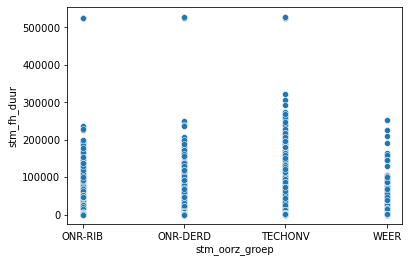

In [6]:
sns.scatterplot(y=storingen['stm_fh_duur'], x=storingen['stm_oorz_groep'])

<AxesSubplot:xlabel='stm_oorz_code', ylabel='stm_fh_duur'>

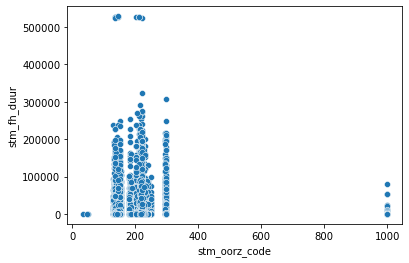

In [7]:
sns.scatterplot(y=storingen['stm_fh_duur'], x=storingen['stm_oorz_code'])

In [117]:
storingen['stm_sap_meldtijd'] = storingen['stm_sap_meldtijd'].str.replace("::", "00:00:00")
storingen['stm_sap_meld_ddt'] = pd.to_datetime(storingen.stm_sap_melddatum[storingen.stm_sap_melddatum != '00000000'].dropna().astype(str) + ' ' + storingen.stm_sap_meldtijd[storingen.stm_sap_meldtijd != '00:00:00'].dropna().astype(str))

#storingen.head()

In [118]:
storingen['stm_oorz_code'] = storingen['stm_oorz_code'].astype(str)
storingen['stm_oorz_code'] = storingen['stm_oorz_code'].str.replace('<NA>', '0')
storingen['stm_oorz_code'] = storingen['stm_oorz_code'].fillna('0')
storingen['stm_oorz_code'] = storingen['stm_oorz_code'].astype(int)
#sns.scatterplot(y=storingen['stm_fh_duur'], x=storingen['stm_oorz_code'].astype(int))
#sns.boxplot(x=storingen['stm_oorz_code'].astype(int))
#print(storingen.isnull().sum().to_string())
#storingen.loc[storingen['stm_oorz_code'] == 200]

In [119]:
#Verwijderen van 0
storingen = storingen[storingen.stm_fh_duur != 0]
storingen['stm_fh_duur'] = storingen['stm_fh_duur']

# Verwijderen van grote outliers
#print(len(storingen['stm_fh_duur']))
duur = storingen['stm_fh_duur']
q1 = duur.quantile(0.25)
q3 = duur.quantile(0.75)
IQR = q3-q1
storingen = storingen[storingen.stm_fh_duur < 3 * IQR]
#print(len(storingen['stm_fh_duur']))

<AxesSubplot:xlabel='stm_geo_gst', ylabel='stm_fh_duur'>

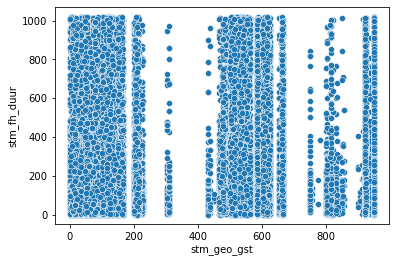

In [120]:
# DONT FORGET ME PLS
storingen =  storingen[storingen.stm_geo_gst.astype(str).apply(lambda x: x.isnumeric())]
sns.scatterplot(y=storingen['stm_fh_duur'], x=storingen['stm_geo_gst'].astype(int))

<AxesSubplot:xlabel='stm_oorz_code', ylabel='stm_fh_duur'>

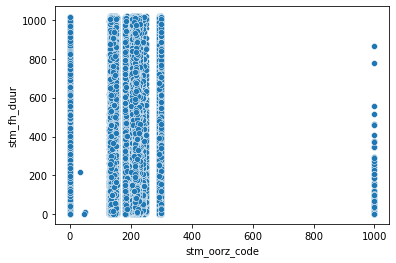

In [115]:
sns.scatterplot(y=storingen['stm_fh_duur'], x=storingen['stm_oorz_code'])

<AxesSubplot:xlabel='stm_sap_meld_ddt', ylabel='stm_fh_duur'>

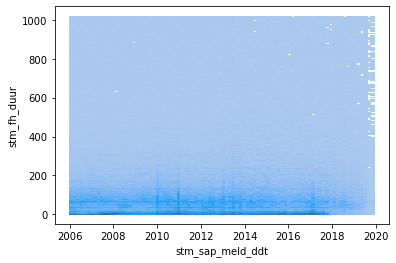

In [58]:
sns.histplot(y=storingen['stm_fh_duur'], x=storingen['stm_sap_meld_ddt'])

# Oefenmodel

In [106]:
storingen.dtypes

stm_oorz_groep                   string
stm_oorz_code                     Int64
stm_geo_gst                       Int64
stm_fh_ddt                       string
stm_sap_storeind_ddt             string
stm_sap_melddatum                string
stm_sap_meldtijd                 string
stm_aanngeb_dd                   string
stm_aanngeb_tijd                 string
stm_aanntpl_dd                   string
stm_aanntpl_tijd                 string
stm_fh_dd                        object
stm_fh_tijd                      string
stm_fh_duur                       Int64
stm_sap_storeinddatum            string
stm_sap_storeindtijd             string
stm_sap_meld_ddt         datetime64[ns]
dtype: object

In [122]:
x = storingen[["stm_oorz_code", "stm_geo_gst"]]
y = storingen["stm_fh_duur"]
y=y.astype('int')

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [124]:
boom = DecisionTreeClassifier()
boom.fit(X_train, Y_train)
acc = boom.score(X_test, Y_test)
print("Acc: " + str(acc))

Acc: 0.028151774785801713


In [125]:
#x = storingen[["stm_oorz_code", "stm_geo_gst"]].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.set_params(weights="distance")
acc = knn.score(X_test, Y_test)
print("Model Accuracy: " + str(acc))

Model Accuracy: 0.02555079559363525


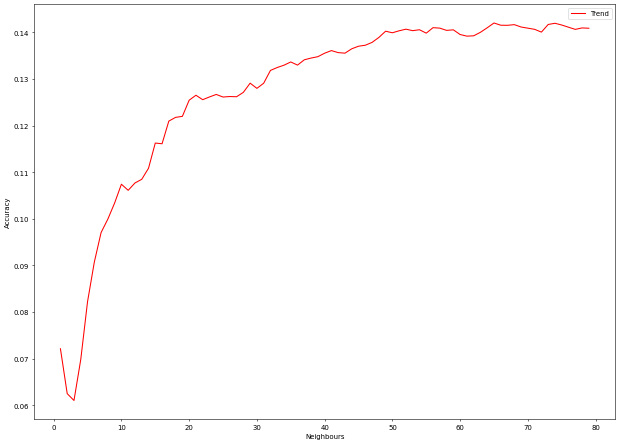

In [92]:
n = []
acc = []

for neighbour in range(1, 80):
    knn.set_params(n_neighbors = neighbour, weights="distance")
    y_pred = knn.predict(X_test)    
    
    n.append(neighbour)
    acc.append(accuracy_score(Y_test, y_pred))   


plt.figure(figsize=(15,11), dpi=50)
plt.plot(n, acc, label="Trend", color="r")
plt.xlabel("Neighbours")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
plt.figure(figsize=(15,11), dpi=100)

tree.plot_tree(boom, rounded=True, filled=True)

plt.show()

In [ ]:
#pred = boom.predict(np.array([10,20]).reshape(-1,1))
acc = boom.score(X_test, Y_test)

#print("duur: " + str(pred))
print("Acc: " + str(acc))

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_geo_gst'>

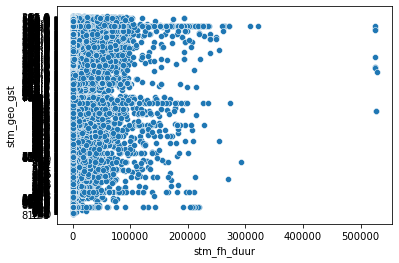

In [57]:
sns.scatterplot(x=storingen['stm_fh_duur'], y=storingen['stm_geo_gst'].astype(str))

<AxesSubplot:xlabel='stm_sap_melddatum', ylabel='stm_fh_duur'>

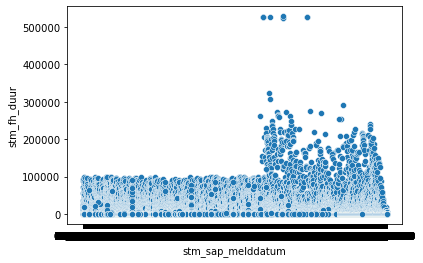

In [48]:
sns.scatterplot(y=storingen['stm_fh_duur'], x=storingen['stm_sap_melddatum'])

Hierna alle lege kolommen verwijderen:

Nog even controleren of alle datatypes kloppen (note: hierbij is object een string):

In [60]:
print(storingen.dtypes.to_string())

stm_oorz_groep           string
stm_oorz_code             Int64
stm_geo_gst              object
stm_fh_ddt               string
stm_sap_storeind_ddt     string
stm_sap_melddatum        string
stm_sap_meldtijd         string
stm_aanngeb_dd           string
stm_aanngeb_tijd         string
stm_aanntpl_dd           string
stm_aanntpl_tijd         string
stm_fh_dd                object
stm_fh_tijd              string
stm_fh_duur               Int64
stm_sap_storeinddatum    string
stm_sap_storeindtijd     string


In [51]:
storingen.describe()

,stm_oorz_code,stm_fh_duur
count,584503.000000,627597.000000
mean,195.730398,1018.442687
std,48.940513,6852.460170
min,33.000000,0.000000
25%,145.000000,12.000000
50%,215.000000,85.000000
75%,221.000000,264.000000
max,999.000000,528297.000000


Hieronder volgt van de te veranderen kolommen, waarom deze worden veranderd.

- stm_mon_nr is een float, maar moet een int zijn.
- stm_geo_mld is een string, maar moet een int zijn.
- stm_geo_mld_uit_functiepl is een float, maar moet een int zijn.
- stm_equipm_nr_gst is een float, maar moet een int zijn.
- stm_km_van_mld is een float, maar moet een int zijn.
- stm_km_tot_mld is een float, maar moet een int zijn.
- stm_prioriteit is een float maar moet een int zijn.
- stm_aanngeb_ddt is een string, maar moet een datetime zijn.
- stm_geo_gst is een string, moet een float worden.
- stm_geo_gst_uit_functiepl is een string, moet een float worden.
- stm_equipm_nr_gst is een float, moet een int worden.
- stm_km_van_gst is een float, maar moet een int zijn.
- stm_km_tot_gst is een float, maar moet een int zijn.
- stm_oorz_code is een flaot, kan een int zijn.
- stm_sap_storeind_ddt is een string, maar moet een datetime zijn.
- stm_tao_indicator is een string, moet een boolean worden.
- stm_tao_beinvloedbaar_indicator is een string, moet een boolean worden.
- stm_evb iz een tring, maar moet een float worden.
- stm_sap_melddatum en stm_sap_meldtijd kunnen samen een datetime worden.
- stm_contractgeb_mld is een float, moet een int zijn.
- stm_contractgeb_gst is een float, moet een int zijn.
- stm_aanngeb_dd en stm_aanngeb_tijd kunnen samen een datetime worden.
- stm_aanntpl_dd en stm_aanntpl_tijd kunnen samen een datetime worden.
- stm_arbeid kan een int worden.
- stm_progfh_in_datum en stm_progfh_in_tijd kunnen samen een datetime worden.
- stm_progfh_in_invoer_dat en stm_progfh_in_invoer_tijd kunnen samen een datetime worden.
- stm_progfh_in_duur moet een integer worden.
- stm_progfh_gw_datum en stm_progfh_gw_tijd kunnen samen een datetime worden.
- stm_progfh_gw_lwd_datum en stm_progfh_gw_lwd_tijd kunnen samen een datetime worden.
- stm_progfh_gw_duur is een string en moet een int zijn
- stm_progfh_gw_teller is een float en moet een int worden.
- stm_afspr_aanvangdd en stm_afspr_aanvangtijd kunnen samen een datetime worden.
- stm_fh_dd en stm_fh_tijd kunnen samen een datetime worden.
- stm_fh_duur moet een int worden.

Voorlopig even kijken naar de numerieke data

In [7]:
storingen.describe()

,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_code,stm_tao_telling_mutatie,stm_contractgeb_mld,stm_contractgeb_gst,stm_arbeid,stm_progfh_gw_lwd_datum,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
count,8.138820e+05,801039.000000,5.920250e+05,8.138790e+05,8.138790e+05,813736.000000,668566.000000,5.411830e+05,8.138780e+05,8.138780e+05,763595.000000,813882.000000,591929.000000,813663.000000,8.138480e+05,3.623000e+03,813848.000000,813848.000000,8.138480e+05
mean,8.992648e+05,337.102347,1.063417e+07,3.525349e+04,1.495798e+04,4.598349,324.363759,1.061428e+07,2.645622e+04,1.139223e+04,193.999582,0.158812,25.313903,25.163049,4.232326e+06,2.015901e+07,0.183303,933.243405,8.982450e+07
std,1.570139e+06,275.292065,4.693697e+05,2.190954e+05,4.886852e+04,2.274724,271.144535,4.689304e+05,8.003314e+04,6.483634e+04,48.576400,0.389902,19.989161,19.678154,2.052824e+07,7.978974e+03,0.485869,6425.421536,2.721452e+08
min,0.000000e+00,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,33.000000,-1.000000,0.000000,0.000000,-1.167950e+05,2.013113e+07,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,85.000000,1.022005e+07,0.000000e+00,0.000000e+00,2.000000,79.000000,1.021169e+07,0.000000e+00,0.000000e+00,144.000000,0.000000,9.000000,9.000000,0.000000e+00,2.016022e+07,0.000000,9.000000,1.800000e+01
50%,0.000000e+00,210.000000,1.059075e+07,1.670000e+04,0.000000e+00,4.000000,203.000000,1.055325e+07,4.264000e+03,0.000000e+00,213.000000,0.000000,22.000000,22.000000,5.000000e+00,2.016060e+07,0.000000,82.000000,6.800000e+01
75%,1.306447e+06,552.000000,1.094516e+07,4.459200e+04,1.160000e+04,5.000000,545.000000,1.091346e+07,3.700100e+04,0.000000e+00,221.000000,0.000000,34.000000,33.000000,5.100000e+01,2.016103e+07,0.000000,253.000000,1.581000e+03
max,5.748960e+06,952.000000,3.039590e+07,6.084449e+07,4.221399e+06,9.000000,952.000000,3.039590e+07,3.096056e+07,3.096056e+07,999.000000,1.000000,99.000000,99.000000,1.057679e+09,2.017050e+07,150.000000,528297.000000,1.060469e+09


In [54]:
all_columns = storingen.columns.values
storingen[all_columns].corr()['stm_fh_duur'].sort_values()

stm_oorz_code   -0.050326
stm_fh_duur      1.000000
Name: stm_fh_duur, dtype: float64

Geen sterke correlatie...

Op zoek naar een betere target variabele.

Nieuw idee nieuwe kolom maken met 
stm_sap_storeind_ddt - stm_sap_meld_ddt

In [23]:
storingen['stm_sap_storeind_ddt'] = pd.to_datetime(storingen['stm_sap_storeind_ddt'])
storingen['stm_sap_meld_ddt'] = pd.to_datetime(storingen['stm_sap_meld_ddt'])
storingen = storingen.dropna(subset=['stm_sap_storeind_ddt', 'stm_sap_meld_ddt'])
storingen['totaaltijd'] = storingen['stm_sap_storeind_ddt'] - storingen['stm_sap_meld_ddt']
storingen['totaaltijd'] = storingen['totaaltijd'].apply(lambda x: int(x.value/ 1000000000 / 60))
for index, column in storingen.iterrows():
    if column['totaaltijd'] < 0:
        column['totaaltijd'] = None
storingen[['totaaltijd', 'stm_sap_storeind_ddt', 'stm_sap_meld_ddt']].head()

,totaaltijd,stm_sap_storeind_ddt,stm_sap_meld_ddt
2,51,2006-02-01 13:26:00,2006-02-01 12:35:00
3,40,2006-02-01 17:20:00,2006-02-01 16:40:00
4,6,2006-02-01 22:36:00,2006-02-01 22:30:00
6,39499,2006-03-01 09:44:00,2006-02-01 23:25:00
7,15,2006-02-01 17:00:00,2006-02-01 16:45:00


In [25]:
all_columns = storingen.dropna().columns.values
storingen[all_columns].corr()['totaaltijd'].sort_values()

stm_progfh_gw_lwd_datum     -0.026629
stm_contractgeb_mld         -0.006415
stm_contractgeb_gst         -0.006100
stm_reactie_duur            -0.004061
stm_oorz_code               -0.002834
stm_mon_nr                  -0.002404
stm_tao_telling_mutatie     -0.002130
stm_equipm_nr_mld           -0.000077
stm_progfh_gw_teller         0.001284
stm_equipm_nr_gst            0.001508
stm_geo_gst_uit_functiepl    0.001512
stm_km_van_mld               0.001583
stm_geo_mld_uit_functiepl    0.001764
stm_arbeid                   0.002496
stm_prioriteit               0.002523
stm_km_van_gst               0.002950
stm_km_tot_gst               0.003266
stm_km_tot_mld               0.003988
stm_fh_duur                  0.038994
totaaltijd                   1.000000
Name: totaaltijd, dtype: float64

In [35]:
storingen.head()

,stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddtstm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorigestm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_datum,stm_progfh_gw_tijd,stm_progfh_gw_lwd_datum,stm_progfh_gw_lwd_tijd,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatumstm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar,totaaltijd
1,NaN,0.0,NaN,2006-02-01 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 09:00:00,81S,624.0,624.0,NaN,NaN,NaN,0.0,0.0,ONR-RIB,133.0,Papieren ontbreken,NaN,2006-02-01 09:00:00,N,NaN,0,B,"0,00",02/01/2006,09:00:00,NaN,624,NaN,81.0,624,S,02/01/2006,09:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,NaN,99999999.0,0.0,00/00/0000,00:00:00,02/01/2006,09:00:00,0.0,99999999.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2,NaN,48.0,GN,2006-02-01 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201.0,201.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 12:35:00,37B,201.0,201.0,NaN,NaN,NaN,30200.0,0.0,ONR-DERD,143.0,NaN,NaN,2006-02-01 13:26:00,N,NaN,0,NB,"0,00",02/01/2006,12:35:00,NaN,201,NaN,37.0,201,B,02/01/2006,12:35:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,NaN,99999999.0,0.0,00/00/0000,00:00:00,02/01/2006,13:26:00,51.0,99999999.0,NaN,schapen op de spoorbaan!,NaN,NaN,Lp,Apg,5.100000e+07
3,NaN,72.0,ZL,2006-02-01 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25.0,25.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 16:40:00,32B,25.0,25.0,NaN,NaN,NaN,14000.0,0.0,ONR-DERD,142.0,NaN,NaN,2006-02-01 17:20:00,N,NaN,0,NB,"0,00",02/01/2006,16:40:00,NaN,025,NaN,32.0,025,B,02/01/2006,16:40:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,NaN,99999999.0,0.0,00/00/0000,00:00:00,02/01/2006,17:20:00,40.0,99999999.0,NaN,Persoon langs de baan,NaN,NaN,Hgl,NaN,4.000000e+07
4,NaN,96.0,ZL,2006-02-01 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12.0,12.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 22:30:00,35B,12.0,12.0,NaN,NaN,NaN,19819.0,0.0,ONR-DERD,142.0,NaN,NaN,2006-02-01 22:36:00,N,NaN,0,NB,"0,00",02/01/2006,22:30:00,NaN,012,NaN,35.0,012,B,02/01/2006,22:30:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,NaN,99999999.0,0.0,00/00/0000,00:00:00,02/01/2006,22:36:00,6.0,99999999.0,NaN,Bijna aanrijding met persoon,NaN,NaN,Hgv,NaN,6.000000e+06
5,NaN,38.0,EHV,2006-02-01 11:23:00,Logboeknr RBV : 38 Tijd: 1123 VL-Post: ...,Logboeknr RBV : 38 Tijd: 1123 VL-P,614.0,614.0,10621391.0,DETECTREIN,GRS SSL Ht,0.0,0.0,9.0,MAFS,02/01/2006 11:23:00,21S,614.0,614.0,10621391.0,DETECTREIN,GRS SSL Ht,0.0,0.0,TECHONV,218.0,NaN,NaN,NaT,N,NaN,0,B,"0,60",02/01/2006,11:23:00,21.0,614-601-1000038436,S,21.0,614-601-1000038436,S,02/01/2006,11:23:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,NaN,99999999.0,0.0,00/00/0000,00:00:00,02/